###Import Dataset

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wintersbae","key":"55045f5bfb861c2c41d471223daa8279"}'}

In [2]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d cnic92/200-financial-indicators-of-us-stocks-20142018

 67% 10.0M/14.8M [00:00<00:00, 39.6MB/s]
100% 14.8M/14.8M [00:00<00:00, 42.7MB/s]


In [4]:
ls

200-financial-indicators-of-us-stocks-20142018.zip  kaggle.json  sample_data/


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


In [199]:
import pandas as pd
df = pd.read_csv('2018_Financial_Data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [200]:
class_col = df.pop('Class')

In [201]:
sec_col = df.pop('Sector')

###Check Missing Values

In [202]:
df.isna().sum()

Revenue                         46
Revenue Growth                 139
Cost of Revenue                185
Gross Profit                    64
R&D Expenses                   237
                              ... 
Book Value per Share Growth    271
Debt Growth                    264
R&D Expense Growth             259
SG&A Expenses Growth           248
2019 PRICE VAR [%]               0
Length: 222, dtype: int64

In [203]:
df = df.drop(df[df['Revenue Growth'].isna()].index)

In [204]:
df.isna().sum().sort_values(ascending=False)

cashConversionCycle                           4247
operatingCycle                                4247
shortTermCoverageRatios                       1791
10Y Shareholders Equity Growth (per Share)    1557
priceEarningsToGrowthRatio                    1526
                                              ... 
Gross Margin                                     0
Earnings before Tax                              0
Operating Income                                 0
Gross Profit                                     0
2019 PRICE VAR [%]                               0
Length: 222, dtype: int64

In [205]:
import numpy as np

print(np.unique(df['operatingProfitMargin'].values))

[ 1. nan]


In [206]:
df = df.drop(['cashConversionCycle', 'operatingCycle', 'operatingProfitMargin'], axis=1)

In [207]:
df.isna().sum().sort_values(ascending=False)

shortTermCoverageRatios                       1791
10Y Shareholders Equity Growth (per Share)    1557
priceEarningsToGrowthRatio                    1526
dividendPayoutRatio                           1526
10Y Net Income Growth (per Share)             1514
                                              ... 
Gross Margin                                     0
Earnings before Tax                              0
Operating Income                                 0
Gross Profit                                     0
2019 PRICE VAR [%]                               0
Length: 219, dtype: int64

In [208]:
Q1 = df['Revenue Growth'].quantile(0.25)
Q3 = df['Revenue Growth'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

0.1885


In [209]:
df_clean = df.copy()
df_clean = df_clean[df_clean['Revenue Growth'] > (Q1 - 1.5 * IQR)]
df_clean = df_clean[df_clean['Revenue Growth'] < (Q3 + 1.5 * IQR)]

In [210]:
df.shape

(4253, 219)

In [211]:
df_clean.shape

(3674, 219)

In [212]:
df = df_clean

In [213]:
labels = df['Revenue Growth']

###Fill Missing Values

In [214]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [215]:
df.isna().sum().sort_values(ascending=False)

Revenue                      0
Free Cash Flow Yield         0
PE ratio                     0
Price to Sales Ratio         0
POCF ratio                   0
                            ..
priceToBookRatio             0
priceToSalesRatio            0
priceEarningsRatio           0
priceToFreeCashFlowsRatio    0
2019 PRICE VAR [%]           0
Length: 219, dtype: int64

###Split Dataset for Initial Model

In [216]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [217]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Revenue Growth')
test_labels = test_features.pop('Revenue Growth')

###Build and Train Initial Model

In [219]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)                        
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(
    train_features, 
    train_labels, 
    validation_split=0.2,
    epochs=100)

Epoch 1/100
74/74 [==============================] - 2s 13ms/step - loss: 0.1368 - mae: 0.1368 - val_loss: 0.1293 - val_mae: 0.1293
Epoch 2/100
74/74 [==============================] - 1s 7ms/step - loss: 0.1188 - mae: 0.1188 - val_loss: 0.1150 - val_mae: 0.1150
Epoch 3/100
74/74 [==============================] - 1s 8ms/step - loss: 0.1016 - mae: 0.1016 - val_loss: 0.1079 - val_mae: 0.1079
Epoch 4/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0879 - mae: 0.0879 - val_loss: 0.1040 - val_mae: 0.1040
Epoch 5/100
74/74 [==============================] - 1s 7ms/step - loss: 0.0834 - mae: 0.0834 - val_loss: 0.0997 - val_mae: 0.0997
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0742 - mae: 0.0742 - val_loss: 0.0911 - val_mae: 0.0911
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0678 - mae: 0.0678 - val_loss: 0.0879 - val_mae: 0.0879
Epoch 8/100
74/74 [==============================] - 0s 4ms/step - loss: 0.0651 - 

###Test Initial Model

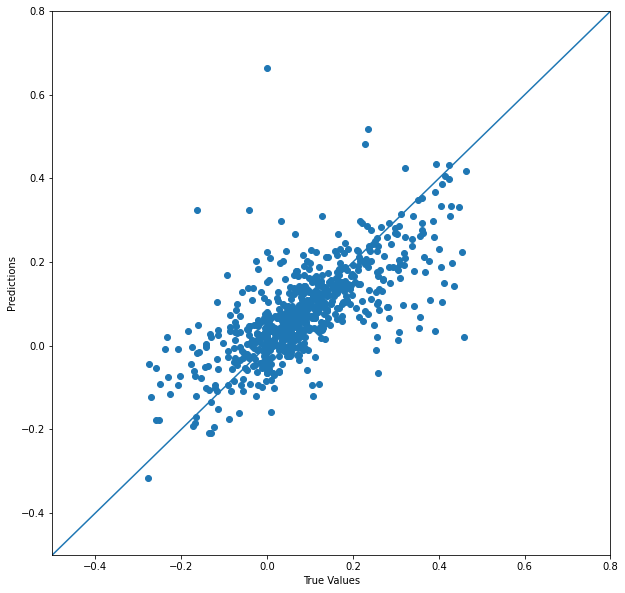

In [220]:
import matplotlib.pyplot as plt

test_pred = model.predict(test_features).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [-0.5, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

###Feature Importance

In [222]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 20.5 MB/s 
     |████████████████████████████████| 133 kB 52.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0b8c3ca20c42a56d860b4c63bbf57effcf9c24aafd95f9205cdcaebf6533509f
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [223]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring='neg_mean_absolute_error', random_state=1).fit(train_features, train_labels)

In [281]:
# from IPython.display import display
# display(eli5.show_weights(perm, top=20, feature_names = train_features.columns.tolist()))
eli5.show_weights(perm, top=50, feature_names = train_features.columns.tolist())

Weight,Feature
0.0610 ± 0.0028,Gross Profit Growth
0.0137 ± 0.0005,Gross Margin
0.0087 ± 0.0009,grossProfitMargin
0.0064 ± 0.0004,Intangibles to Total Assets
0.0063 ± 0.0005,3Y Revenue Growth (per Share)
0.0057 ± 0.0005,SG&A Expenses Growth
0.0056 ± 0.0003,5Y Operating CF Growth (per Share)
0.0054 ± 0.0003,assetTurnover
0.0049 ± 0.0005,10Y Net Income Growth (per Share)
0.0049 ± 0.0002,10Y Shareholders Equity Growth (per Share)


###Create New Dataset

In [229]:
df_new = pd.read_csv('2018_Financial_Data.csv')
df_new.drop(df_new.columns[0], axis=1, inplace=True)
df_new.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [230]:
df_new = df_new.drop(df_new[df_new['Revenue Growth'].isna()].index)

In [231]:
cols = [
  'Gross Profit Growth',
  'Gross Margin',
  'Intangibles to Total Assets',
  'Net Income',
  'assetTurnover',
  'Revenue',
  'Interest Expense',
  'Debt to Assets',
  'R&D Expenses',
  'SG&A Expense',
  'Revenue Growth'
]

df_red = df_new[cols]
df_red.head()

,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
0,0.1115,1.0000,0.6660,1.173100e+10,0.375499,9.450700e+10,3.542000e+09,0.4440,0.000000e+00,6.482200e+10,0.1115
1,0.0564,0.4847,0.3150,1.609000e+09,0.179342,1.414400e+10,1.917000e+09,0.4733,0.000000e+00,6.010000e+08,0.0320
2,0.1187,0.6173,0.2841,2.105300e+10,0.553660,7.084800e+10,-1.260000e+08,0.2060,1.354300e+10,6.750000e+09,0.1289
3,1.1208,0.5887,0.0359,1.413500e+10,0.700641,3.039100e+10,3.420000e+08,0.1069,2.141000e+09,8.130000e+08,0.4955
4,0.7216,0.2151,0.1484,-2.235500e+10,0.390955,1.216150e+11,5.059000e+09,0.3330,0.000000e+00,1.811100e+10,0.0285


In [232]:
df_red.shape

(4253, 11)

###Remove Outlier from New Dataset

In [233]:
df_tmp = df_red.copy()
no = 0
Q1 = df_tmp.quantile(0.25)
Q3 = df_tmp.quantile(0.75)
IQR = Q3 - Q1
for col in df_tmp.columns:
  df_tmp = df_tmp[df_tmp[col] > (Q1[no] - 1.5 * IQR[no])]
  df_tmp = df_tmp[df_tmp[col] < (Q3[no] + 1.5 * IQR[no])]
  no += 1

In [234]:
df_tmp.shape

(1913, 11)

In [236]:
df_new = df_tmp

###Split Dataset for Final Model

In [237]:
train_features_new = df_new.sample(frac=0.85, random_state=0)
test_features_new = df_new.drop(train_features_new.index)

train_labels_new = train_features_new.pop('Revenue Growth')
test_labels_new = test_features_new.pop('Revenue Growth')

In [238]:
train_features_new.shape

(1626, 10)

###Build and Train Final Model

In [274]:
import tensorflow as tf

normalizer_new = tf.keras.layers.Normalization()
normalizer_new.adapt(np.array(train_features_new))

model_new = tf.keras.Sequential([
    normalizer_new,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)                        
])

model_new.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(),
    metrics = ['mae']
)

history = model_new.fit(
    train_features_new, 
    train_labels_new, 
    validation_split=0.2,
    epochs=10)

Epoch 1/10
41/41 [==============================] - 1s 7ms/step - loss: 0.0753 - mae: 0.0753 - val_loss: 0.0571 - val_mae: 0.0571
Epoch 2/10
41/41 [==============================] - 0s 4ms/step - loss: 0.0517 - mae: 0.0517 - val_loss: 0.0475 - val_mae: 0.0475
Epoch 3/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0456 - mae: 0.0456 - val_loss: 0.0577 - val_mae: 0.0577
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.0459 - val_loss: 0.0535 - val_mae: 0.0535
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0424 - mae: 0.0424 - val_loss: 0.0488 - val_mae: 0.0488
Epoch 6/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0400 - mae: 0.0400 - val_loss: 0.0447 - val_mae: 0.0447
Epoch 7/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.0376 - val_loss: 0.0454 - val_mae: 0.0454
Epoch 8/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0386 - mae: 0.03

###Test Final Model

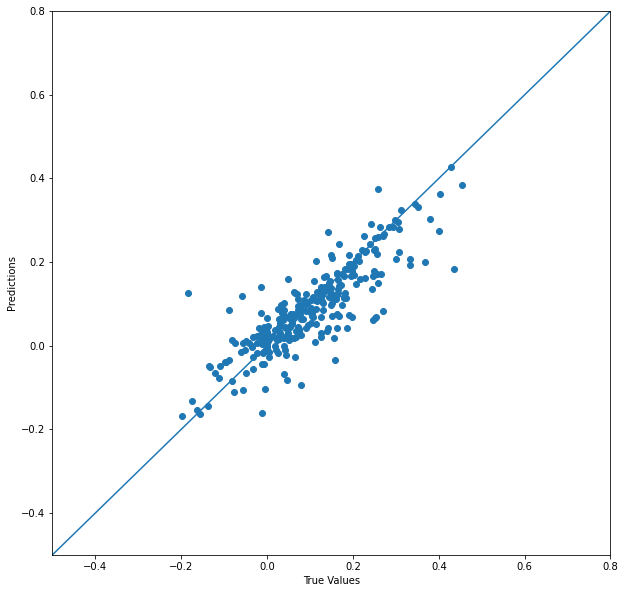

In [275]:
import matplotlib.pyplot as plt

test_pred_new = model_new.predict(test_features_new).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels_new, test_pred_new)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [-0.5, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [286]:
model_new.predict(test_features_new.iloc[4].values)

array([[0.08344211]], dtype=float32)

In [280]:
test_labels_new

208     0.1061
341     0.1922
348     0.3677
356     0.1479
374     0.2711
         ...  
4334    0.0000
4335    0.1212
4340    0.0781
4361    0.0915
4382    0.1068
Name: Revenue Growth, Length: 287, dtype: float64

###Model Evaluation with R2 Score

In [276]:
from sklearn.metrics import r2_score
r2_score(test_labels_new, test_pred_new)

0.7115936263499012

###Save Final Model in SavedModel format

In [ ]:
# !mkdir -p saved_model
# tf.saved_model.save(model_red, 'saved_model/revenue_growth_regression_model')

INFO:tensorflow:Assets written to: saved_model/revenue_growth_regression_model/assets


###Save Final Model in H5 format

In [ ]:
# !mkdir -p h5_model
# model_red.save('h5_model/revenue_growth_regression_model.h5')

###Convert and Save Final Model into TFLite format

In [287]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=model_new)
tfmodel = converter.convert()
open("revenue_growth.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpay_dmrwo/assets


171992

In [ ]:
ls

2014_Financial_Data.csv  2017_Financial_Data.csv  revenue_growth.tflite
2015_Financial_Data.csv  2018_Financial_Data.csv  sample_data/
2016_Financial_Data.csv  kaggle.json
